# *Python Implementation on Logistic Regression*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import load_iris

In [3]:
data = load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [7]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In logistic Regression till now we have studied two values of target variable (Binary classification)
- In this case we filter out for two

In [8]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
# Making data frame
df = pd.DataFrame(data.data, columns=data.feature_names)

In [12]:
df['target'] = data.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [15]:
df.sample(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
48,5.3,3.7,1.5,0.2,0


In [16]:
# Unique values in target column
df['target'].unique()

array([0, 1, 2])

In [18]:
# We need filter two class only for binary classification
df = df[df['target'] != 2]
df['target'].unique()

array([0, 1])

In [19]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [23]:
# Separating features and target variable  (Separating X and y )
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [24]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
95,5.7,3.0,4.2,1.2
96,5.7,2.9,4.2,1.3
97,6.2,2.9,4.3,1.3
98,5.1,2.5,3.0,1.1


In [25]:
y

0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Name: target, Length: 100, dtype: int64

In [27]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)   

In [28]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 4), (20, 4), (80,), (20,))

In [29]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
2,4.7,3.2,1.3,0.2
73,6.1,2.8,4.7,1.2
97,6.2,2.9,4.3,1.3
62,6.0,2.2,4.0,1.0
19,5.1,3.8,1.5,0.3
...,...,...,...,...
75,6.6,3.0,4.4,1.4
9,4.9,3.1,1.5,0.1
72,6.3,2.5,4.9,1.5
12,4.8,3.0,1.4,0.1


In [31]:
# Model Training
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [32]:
model

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [33]:
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [35]:
# Prediction
y_pred = model.predict(X_test)
y_pred

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0])

In [36]:
# To get the probability values on X_test
model.predict_proba(X_test)

array([[0.04043262, 0.95956738],
       [0.01046123, 0.98953877],
       [0.98706759, 0.01293241],
       [0.05440516, 0.94559484],
       [0.1383348 , 0.8616652 ],
       [0.97966131, 0.02033869],
       [0.98204504, 0.01795496],
       [0.03292232, 0.96707768],
       [0.03380573, 0.96619427],
       [0.00850516, 0.99149484],
       [0.02466034, 0.97533966],
       [0.97515854, 0.02484146],
       [0.00517837, 0.99482163],
       [0.00238366, 0.99761634],
       [0.0077453 , 0.9922547 ],
       [0.98619342, 0.01380658],
       [0.96597536, 0.03402464],
       [0.94907826, 0.05092174],
       [0.00735493, 0.99264507],
       [0.97742977, 0.02257023]])

In [37]:
# Evaluation Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Accuracy: 1.0
Confusion Matrix:
 [[ 8  0]
 [ 0 12]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [38]:
# First two rows, 0 & 1 >> Precision, recall f1 score wrt to respective classes
# Macro avg >> Average of precision, recall, f1 score without considering the support
# Weighted avg >> Average of precision, recall, f1 score considering the support

In [49]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [50]:
# get predicted probabilities of class 1 only
y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred_prob

array([0.95956738, 0.98953877, 0.01293241, 0.94559484, 0.8616652 ,
       0.02033869, 0.01795496, 0.96707768, 0.96619427, 0.99149484,
       0.97533966, 0.02484146, 0.99482163, 0.99761634, 0.9922547 ,
       0.01380658, 0.03402464, 0.05092174, 0.99264507, 0.02257023])

In [51]:
# Making ROC Curve
# Input : y_test (actual values), y_pred_prob (predicted probabilities)
# Returns : fpr, tpr, thresholds with different cut off values
# fpr - False Positive Rate
# tpr - True Positive Rate


fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
print("FPR:", fpr)
print("TPR:", tpr)
print("Thresholds:", thresholds)


FPR: [0. 0. 0. 1.]
TPR: [0.         0.08333333 1.         1.        ]
Thresholds: [       inf 0.99761634 0.8616652  0.01293241]


In [52]:
roc_auc = auc(fpr, tpr)
roc_auc

1.0

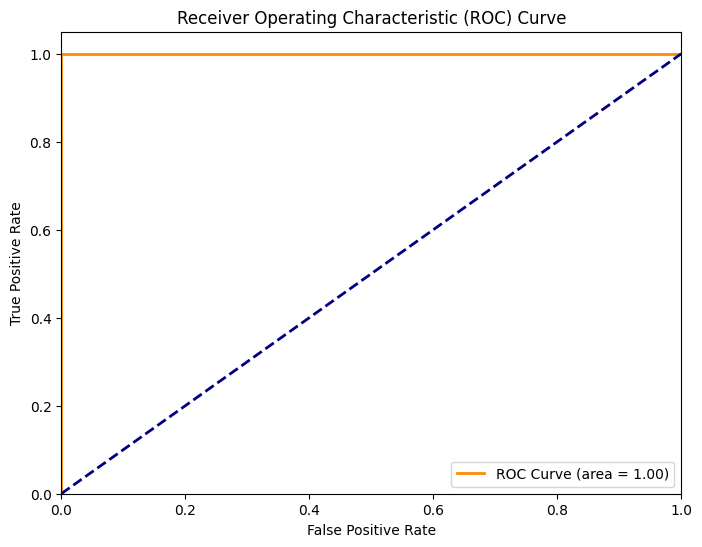

In [53]:
# Plot for ROC Curve
plt.figure(figsize=(8, 6)) # Create a new figure with specified size
plt.plot(fpr, tpr, color='darkorange', linewidth= 2, label='ROC Curve (area = %0.2f)' % roc_auc) # Plot ROC curve
plt.plot([0, 1], [0, 1], color='navy', linewidth = 2, linestyle='--') # Diagonal line representing random guessing
plt.xlim([0.0, 1.0]) # Set x-axis limits
plt.ylim([0.0, 1.05]) # Set y-axis limits
plt.xlabel('False Positive Rate') # Label for x-axis
plt.ylabel('True Positive Rate') # Label for y-axis
plt.title('Receiver Operating Characteristic (ROC) Curve') # Title of the plot
plt.legend(loc='lower right') # Legend location 
plt.show()

In [54]:
# Cross validation >> Logistic Regression CV
# Randomized Search CV or Grid Search CV
# By default logistic regression CV
# Specific to logistic regression
# k-fold > Generic method


from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold

In [55]:
cv = KFold(n_splits=5)

# Shuffle : bool, default : false
# whether to shuffle data before spitting into batches
# The sample within each split cannot be shuffle

In [56]:
cv

KFold(n_splits=5, random_state=None, shuffle=False)

In [57]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv = cv, scoring= 'accuracy')

In [58]:
scores

array([1., 1., 1., 1., 1.])

In [59]:
np.mean(scores)

np.float64(1.0)